In [49]:
#pip install qiskit

In [50]:
#pip install qiskit[visualization]

In [51]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.circuit.library import MCMT
from qiskit.circuit.library import MCMTVChain
from qiskit.circuit.library import SXdgGate
from qiskit.quantum_info.operators import Operator, Pauli
import qiskit.quantum_info as qi
import numpy as np
import math as m
from qiskit import *
from qiskit import Aer


# Hadamard coin

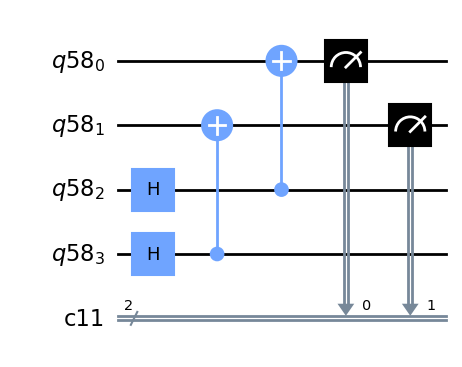

In [52]:
qreg = qiskit.QuantumRegister(4)
creg = qiskit.ClassicalRegister(2)

circuit = qiskit.QuantumCircuit(qreg,creg)

n_steps=1
for i in range(n_steps):
  circuit.h(2)
  circuit.h(3)
  circuit.cx(3,1)
  circuit.cx(2,0)

circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw('mpl')

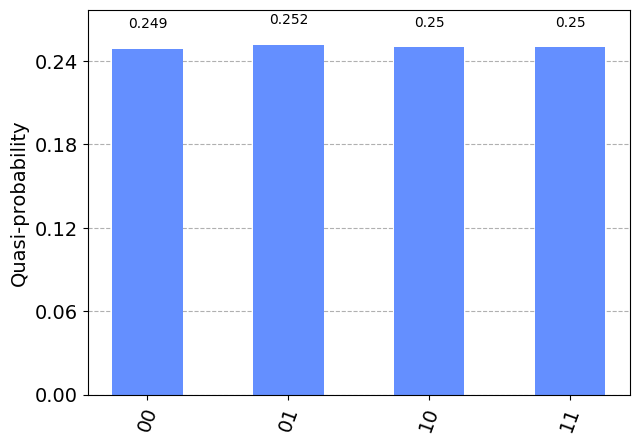

In [53]:
#Changing the simulator 
sim = qiskit.Aer.get_backend('qasm_simulator')
#job execution and getting the result as an object
job = execute(circuit, sim,shots=100000)
result = job.result()

counts = job.result().get_counts()

factor=1.0/sum(counts.values())
probabilities1 = {k: v*factor for k, v in counts.items()}

qiskit.visualization.plot_histogram(probabilities1)

#Generalized coin

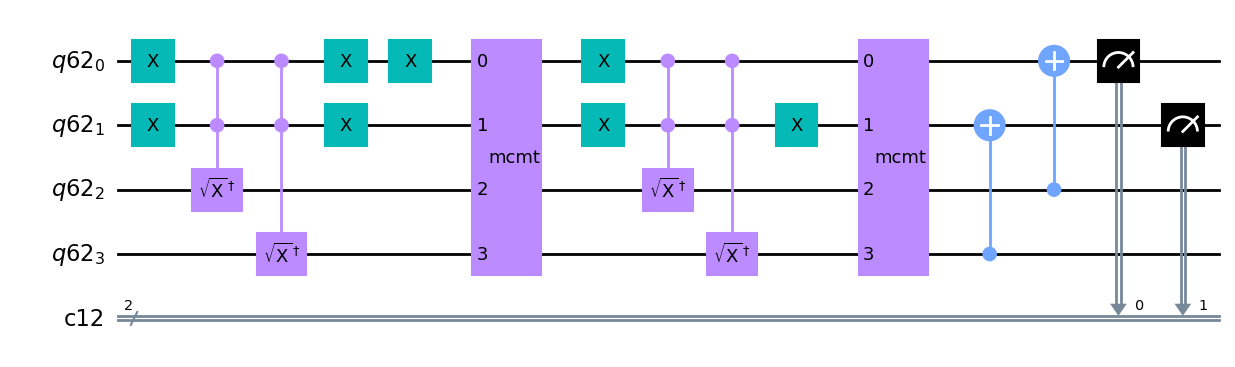

In [54]:
q = QuantumRegister(4)
c = ClassicalRegister(2)

qc = QuantumCircuit(q,c)
csxdg_gate = SXdgGate().control(2)

for i in range(n_steps):
  qc.x(0)
  qc.x(1)
  qc.append(csxdg_gate, [0,1,2])
  qc.append(csxdg_gate, [0,1,3])
  qc.x(0)
  qc.x(1)

  qc.x(0)
  qc.append(MCMT('h',2,2), list(range(4)))
  qc.x(0)

  qc.x(1)
  qc.append(csxdg_gate, [0,1,2])
  qc.append(csxdg_gate, [0,1,3])
  qc.x(1)

  qc.append(MCMT('h',2,2), list(range(4)))

  qc.cx(3,1)
  qc.cx(2,0)

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw('mpl')


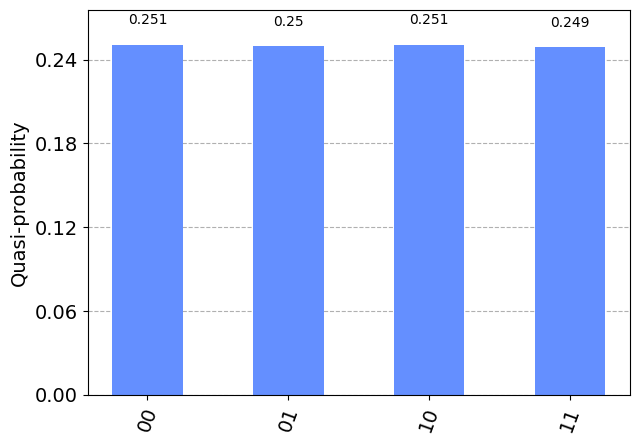

In [55]:
#Changing the simulator 
sim = qiskit.Aer.get_backend('qasm_simulator')
#job execution and getting the result as an object
job = execute(qc, sim,shots=100000)
result = job.result()

counts = job.result().get_counts()

factor=1.0/sum(counts.values())
probabilities2 = {k: v*factor for k, v in counts.items()}

qiskit.visualization.plot_histogram(probabilities2)

#Comparison of probability distributions

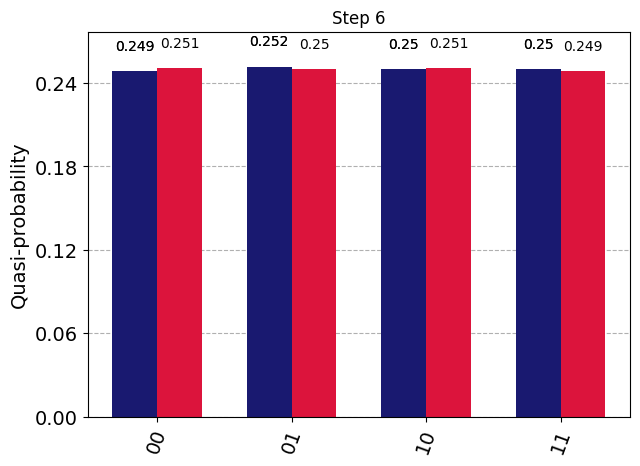

In [56]:
legend = ['Hadamard coin', 'General coin']

qiskit.visualization.plot_histogram([probabilities1, probabilities2], color=['midnightblue','crimson'],
                title="Step 6")